# Fall 2019 CX4641/CS7641 Homework 4

## Instructor: Dr. Mahdi Roozbahani

## Deadline: Dec 3, Tuesday, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged, but each student must write his own answers and explicitly mention any collaborators.

* Homework submission ONLY in .ipynb format. You don't need to submit the image.

* Throughout the ipython notebook, we use attribute and feature interchangeably.

* Graduate students are required to answer all the questions including bonus parts. Bonus points are just for undergraduate students.


# Environment Setup

In [5]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## Part 1: Utility Functions [25pts]

Here, we ask you to develop a few functions that will be the main building blocks of your decision tree and random forest algorithms.

### Entropy and information gain [10pts]

First, we computes entropy and then use this entropy for information gain.

In [6]:
def entropy(class_y):
    """ 
    Input: 
        - class_y: list of class labels (0's and 1's)
    
    TODO: Compute the entropy for a list of classes
    Example: entropy([0,0,0,1,1,1,1,1]) = 0.9544
    """

    elements,counts = np.unique(class_y,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
    #raise NotImplementedError

In [7]:
def information_gain(previous_y, current_y):
    """
    Inputs:
        - previous_y : the distribution of original labels (0's and 1's)
        - current_y  : the distribution of labels after splitting based on a particular
                     split attribute and split value
    
    TODO: Compute and return the information gain from partitioning the previous_y labels into the current_y labels.
    
    Reference: http://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15381-s06/www/DTs.pdf 

    Example: previous_y = [0,0,0,1,1,1], current_y = [[0,0], [1,1,1,0]], info_gain = 0.4591
    """ 
    
    num_labels = len(previous_y)
    prev_entropy = entropy(previous_y)
    average_entropy = 0
    
    for row in current_y:
        cond_entropy = entropy(row)
        prob = len(row) / num_labels
        average_entropy += cond_entropy * prob

    info_gain = prev_entropy - average_entropy
    return info_gain
    #raise NotImplementedError

In [8]:
# TEST CASE
test_class_y = [0,0,0,1,1,1,1,1]
print(entropy(test_class_y))

previous_y = [0,0,0,1,1,1]
current_y = [[0,0], [1,1,1,0]] 
print(information_gain(previous_y, current_y))

0.954434002924965
0.4591479170272448


### Build a simple desicion tree step by step [15pts]

Now we will implement three functions to build a decision tree from the scratch.

#### (1) partition_classes: [5pts]

One of the basic operations is to split a tree on one attribute (features) with a specific value for that attribute.

In partition_classes(), we split the data (X) and labels (y) based on the split feature and value - BINARY SPLIT.

You will have to first check if the split attribute is numerical or categorical. If the split attribute is numeric, split_val should be a numerical value. For example, your split_val should go over all the values of attributes. If the split attribute is categorical, split_val should include all the categories one by one.   
    
You can perform the partition in the following way:
   - Numeric Split Attribute:
   
       Split the data X into two lists(X_left and X_right) where the first list has all
       the rows where the split attribute is less than or equal to the split value, and the 
       second list has all the rows where the split attribute is greater than the split 
       value. Also create two lists(y_left and y_right) with the corresponding y labels.
    
   - Categorical Split Attribute:
   
       Split the data X into two lists(X_left and X_right) where the first list has all 
       the rows where the split attribute is equal to the split value, and the second list
       has all the rows where the split attribute is not equal to the split value.
       Also create two lists(y_left and y_right) with the corresponding y labels.




In [9]:
def partition_classes(X, y, split_attribute, split_val):
    """
    Inputs:
    - X               : (N,D) list containing all data attributes
    - y               : a list of labels
    - split_attribute : column index of the attribute to split on
    - split_val       : either a numerical or categorical value to divide the split_attribute
    
    TODO: Partition the data(X) and labels(y) based on the split value - BINARY SPLIT.
    
    Example:
    
    X = [[3, 'aa', 10],                 y = [1,
         [1, 'bb', 22],                      1,
         [2, 'cc', 28],                      0,
         [5, 'bb', 32],                      0,
         [4, 'cc', 32]]                      1]
    
    Here, columns 0 and 2 represent numeric attributes, while column 1 is a categorical attribute.
    
    Consider the case where we call the function with split_attribute = 0 (the index of attribute) and split_val = 3 (the value of attribute).
    Then we divide X into two lists - X_left, where column 0 is <= 3 and X_right, where column 0 is > 3.
    
    X_left = [[3, 'aa', 10],                 y_left = [1,
              [1, 'bb', 22],                           1,
              [2, 'cc', 28]]                           0]
              
    X_right = [[5, 'bb', 32],                y_right = [0,
               [4, 'cc', 32]]                           1]

    Consider another case where we call the function with split_attribute = 1 and split_val = 'bb'
    Then we divide X into two lists, one where column 1 is 'bb', and the other where it is not 'bb'.
        
    X_left = [[1, 'bb', 22],                 y_left = [1,
              [5, 'bb', 32]]                           0]
              
    X_right = [[3, 'aa', 10],                y_right = [1,
               [2, 'cc', 28],                           0,
               [4, 'cc', 32]]                           1]
               
    Return in this order: (X_left, X_right, y_left, y_right)           
    """
    X_left = []
    X_right = []
    
    y_left = []
    y_right = []
    
    for i in range(len(X)):
        if type(split_attribute) is str :
            if X[i][split_attribute] == split_val:
                X_left.append(X[i])
                y_left.append(y[i])
            else:
                X_right.append(X[i])
                y_right.append(y[i])
        else:
            if X[i][split_attribute] <= split_val:
                X_left.append(X[i])
                y_left.append(y[i])
            else:
                X_right.append(X[i])
                y_right.append(y[i])
    
    return (np.array(X_left,dtype='object'), np.array(X_right,dtype='object'), np.array(y_left), np.array(y_right))
    #raise NotImplementedError


#### (2) find_best_split [5pts]

Given the data and labels, we need to find the order of splitting features, which is also the importance of the feature. For each attribute (feature), we need to calculate its optimal split value along with the corresponding information gain and then compare with all the features to find the optimal attribute to split.

First, we specify an attribute. After computing the corresponding information gain of each value at this attribute list, we can get the optimal split value, which has the maximum information gain.

In [10]:
def find_best_split(X, y, split_attribute):
    """Inputs:
        - X               : (N,D) list containing all data attributes
        - y               : a list array of labels
        - split_attribute : Column of X on which to split
    
    TODO: Compute and return the optimal split value for a given attribute, along with the corresponding information gain
    
    Note: You will need the functions information_gain and partition_classes to write this function
    
    Example:
    
        X = [[3, 'aa', 10],                 y = [1,
             [1, 'bb', 22],                      1,
             [2, 'cc', 28],                      0,
             [5, 'bb', 32],                      0,
             [4, 'cc', 32]]                      1]
    
        split_attribute = 0
        
        Starting entropy: 0.971
        
        Calculate information gain at splits:
           split_val = 1  -->  info_gain = 0.17
           split_val = 2  -->  info_gain = 0.02
           split_val = 3  -->  info_gain = 0.02
           split_val = 4  -->  info_gain = 0.32
           split_val = 5  -->  info_gain = 0.
        
       best_split_val = 4; info_gain = .32;
    """
    best_split_val = 0
    info_gain = 0
    X = np.array(X, dtype='object')
    split_vals = np.unique(X[:,split_attribute])
    for i,split_val in enumerate(split_vals):
        X_left, X_right, y_left, y_right = partition_classes(X, y, split_attribute, split_val)
        split_info = information_gain(y,[y_left,y_right])
        if(split_info >= info_gain):
            info_gain = split_info
            best_split_val = split_val
    return (best_split_val,info_gain)
    #raise NotImplementedError


#### (3)  find_best_feature [5pts]

Based on the above functions, we can find the most important feature that we will split first.

In [11]:
def find_best_feature(X, y):
    """
    Inputs:
        - X: (N,D) list containing all data attributes
        - y : a list of labels
    
    TODO: Compute and return the optimal attribute to split on and optimal splitting value
    
    Note: If two features tie, choose one of them at random
    
    Example:
    
        X = [[3, 'aa', 10],                 y = [1,
             [1, 'bb', 22],                      1,
             [2, 'cc', 28],                      0,
             [5, 'bb', 32],                      0,
             [4, 'cc', 32]]                      1]
    
        split_attribute = 0
        
        Starting entropy: 0.971
        
        Calculate information gain at splits:
           feature 0:  -->  info_gain = 0.32
           feature 1:  -->  info_gain = 0.17
           feature 2:  -->  info_gain = 0.42
        
        best_split_feature: 2 best_split_val: 22
    """
    best_split_feature = 0
    best_split_val = None
    info = 0
    for i in range(np.array(X).shape[1]):
        split_val , info_gain = find_best_split(X, y, i)
        X_left, X_right, y_left, y_right = partition_classes(X, y, i, split_val)
        split_info = information_gain(y,[y_left,y_right])
        if(split_info >= info):
            info = split_info
            best_split_feature = i
            best_split_val = split_val
    return (best_split_feature, best_split_val)
    #raise NotImplementedError

In [12]:
# TEST CASE
test_X = [[3, 'aa', 10],[1, 'bb', 22],[2, 'cc', 28],[5, 'bb', 32],[4, 'cc', 32]]
test_y = [1,1,0,0,1]
print(partition_classes(test_X, test_y, 0, 3))
print(partition_classes(test_X, test_y, 1, 'bb'))

split_attribute = 0
best_split_val, info_gain = find_best_split(test_X, test_y, split_attribute)
print("best_split_val:", best_split_val, "info_gain:", info_gain)

best_feature, best_split_val = find_best_feature(test_X, test_y)
print("best_split_feature:", best_feature, "best_split_val:", best_split_val)

(array([[3, 'aa', 10],
       [1, 'bb', 22],
       [2, 'cc', 28]], dtype=object), array([[5, 'bb', 32],
       [4, 'cc', 32]], dtype=object), array([1, 1, 0]), array([0, 1]))
(array([[3, 'aa', 10],
       [1, 'bb', 22],
       [5, 'bb', 32]], dtype=object), array([[2, 'cc', 28],
       [4, 'cc', 32]], dtype=object), array([1, 1, 0]), array([0, 1]))
best_split_val: 4 info_gain: 0.3219280948873623
best_split_feature: 2 best_split_val: 22


# Part 2: Decision Tree [20 pts]
## Please read the following instructions carefully before you dive into coding

In this part, you will implement your own ID3 decision tree class and make it work on training and test set.

You may use a recursive way to construct the tree and make use of helper functions in Part1. 

Please keep in mind that we use information gain to find the best feature and value to split the data for ID3 tree.

To save your training time, we have added a ```max_depth``` parameter to control the maximum depth of the tree. You may adjust its value to pre-pruned the tree. If set to None, it has no control of depth.

You need to have a stop condition for splitting. This can be like, all labels in the current node are the same or reaching the pre-defined max_depth.

The MyDecisionTree class should have some member variables. We highly encourage you to use a list in Python to store the tree information. For leaves nodes, this list may have just one element representing the class label. For non-leaves node, the list should at least store the feature and value to split, and references to its left and right child.

### If you use different ways to represent and store the information, please include clear comments or documentations with your code. If your result if not correct, partial credits can only be awarded if we are able to understand your code

In [13]:
class MyDecisionTree(object):
    def __init__(self, max_depth=None):
        """
        TODO: Initializing the tree as an empty dictionary or list, as preferred.
        
        For example: self.tree = [] or self.tree = {}
        """
        self.tree = {}
        self._max_depth = max_depth
        #raise NotImplementedError

    def fit(self, X, y, depth):
        """
        TODO: Train the decision tree (self.tree) using the the sample X and labels y.
        
        NOTE: You will have to make use of the utility functions to train the tree.
        One possible way of implementing the tree: Each node in self.tree could be in the form of a dictionary:
        https://docs.python.org/2/library/stdtypes.html#mapping-types-dict
        
        For example, a non-leaf node with two children can have a 'left' key and  a  'right' key. 
        You can add more keys which might help in classification (eg. split attribute and split value)
        """
        if(len(set(y))==1 or depth >= self._max_depth):
            self.tree['node'] = 'leaf'
            self.tree['label'] = y[0]
            return
        else:
            attribute, feat = find_best_feature(X,y)
            xl,xr,yl,yr = partition_classes(X,y,attribute,feat)
            self.tree['left'] = MyDecisionTree(self._max_depth)
            self.tree['right'] = MyDecisionTree(self._max_depth)
            self.tree['right'].fit(xr,yr,depth+1)
            self.tree['left'].fit(xl,yl,depth+1)
            self.tree['node'] = 'node'
            self.tree['attribute'] = attribute
            self.tree['value'] = feat
        pass
        #raise NotImplementedError

    def predict(self, record):
        """
        TODO: classify a sample in test data set using self.tree and return the predicted label
        """
        if self.tree['node'] == 'leaf':
            return self.tree['label']
        else:
            if type(record[self.tree['attribute']]) is not str:
                if record[self.tree['attribute']] <= self.tree['value']:
                    return self.tree['left'].predict(record)
                else:
                    return self.tree['right'].predict(record)
            else:
                if record[self.tree['attribute']] == self.tree['value']:
                    return self.tree['left'].predict(record)
                else:
                    return self.tree['right'].predict(record)
        #raise NotImplementedError

In [14]:
# helper function. You don't have to modify it
def DecisionTreeEvalution(dt,X,y, verbose=True):

    # Make predictions
    # For each test sample X, use our fitting dt classifer to predict
    y_predicted = []
    for record in X: 
        y_predicted.append(dt.predict(record))

    # Comparing predicted and true labels
    results = [prediction == truth for prediction, truth in zip(y_predicted, y)]

    # Accuracy
    accuracy = float(results.count(True)) / float(len(results))
    if verbose:
        print("accuracy: %.4f" % accuracy)
    return accuracy
    

Now, let us use the Decision Tree to build a classifier and then to make predictions.
First load training and test dataset. Please do not modify the code in the below cell

In [15]:
# helper function. You don't have to modify it
data_test = pd.read_csv("hw4_data_test.csv")
data_valid = pd.read_csv("hw4_data_valid.csv")
data_train = pd.read_csv("hw4_data_train.csv")

categorical = ['workclass', 'education', 'marital-status', 'occupation', 
                   'relationship', 'race', 'sex', 'native-country']
numerical = ['age', 'fnlwgt', 'education-num','capital-gain', 'capital-loss',
                'hours-per-week']

for feature in categorical:
        le = LabelEncoder()
        data_train[feature] = le.fit_transform(data_train[feature])
        data_test[feature] = le.fit_transform(data_test[feature])
        
X_train = pd.concat([data_train[categorical], data_train[numerical]], axis=1)
y_train = data_train['high-income']
X_test = pd.concat([data_test[categorical], data_test[numerical]], axis=1)
y_test = data_test['high-income']
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

for feature in categorical:
        le = LabelEncoder()
        data_valid[feature] = le.fit_transform(data_valid[feature])  
        
X_valid = pd.concat([data_valid[categorical], data_valid[numerical]], axis=1)
y_valid = data_valid['high-income']
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

Now, use the training data to fit your decision tree. It may take 3 - 10 minutes for fully fitting the tree. You may adjust the max_depth parameter to save some of your time(This may affect accuracy)
. We will not take running time into account when grading this part. You should reach at least 80% accuracy on test set to receive full credits

In [23]:
# Initializing a decision tree.
max_depth = 8 #takes about 17 minutes to run for me
dt = MyDecisionTree(max_depth)

# Building a tree
print("fitting the decision tree")
dt.fit(X_train, y_train, 0)

print("testing the tree")
# Evaluating the decision tree
DecisionTreeEvalution(dt,X_test,y_test, True)

fitting the decision tree
testing the tree
accuracy: 0.8189


0.8188750138136811

---------
# Part 3
## This part is challenging so bonus for both undergrads and grads : Pruning (10 Pts)

In order to avoid overfitting, you can: 1. Acquire more training data; 2. Remove irrelevant attributes; 3. Grow full tree, then post-prune; 4. Ensemble learning. 

In this bonus part, you are going to apply reduced error post-pruning to prune the fully grown tree.
The idea is basically about, starting at the leaves, each node is replaced with its most popular class. If the prediction accuracy is not affected then the change is kept. You may also try recursive function to apply the post-pruning. Please notice we use validation set to get the accuracy for each node during the pruning

In [24]:
#  Define the post-pruning function
def pruning(dt, X, y):
    """
    TODO:
    1. Prune the full grown decision tress recursively.  
    2. Classify examples in validation set.
    3. For each node: 
    3.1 Sum errors over the entire subtree. You may want to use the helper function "DecisionTreeEvalution".
    3.2 Calculate the error on same example if converted to a leaf with majority class label. 
    You may want to use the helper function "DecisionTreeError".
    4. If error rate in the subtree is greater than in the single leaf, replace the whole subtree by a leaf node.
    5. Return the pruned decision tree.
    """
    #  Delete this line when you implement the function
    raise NotImplementedError
               
def DecisionTreeError(y):
    # helper function for calculating the error of the entire subtree if converted to a leaf with majority class label.
    # You don't have to modify it  
    num_ones = np.sum(y)
    num_zeros = len(y) - num_ones
    return 1.0 - max(num_ones, num_zeros) / float(len(y))


Now, you should make use of the decision tree you trained in part1. Make sure to let it have 20 or greater depths. Due the unbalance of our dataset, the post-pruning does not necessarily have better accuracy on test set. We will award full credits as long as your implementation is correct the

In [ ]:
# helper function. You don't have to modify it.
# pruning the full grown decision tree using validation set 
# dt should be a decision tree object that has been fully trained
dt_pruned=pruning(dt, X_test, y_test)

# Evaluate the decision tree using test set 
DecisionTreeEvalution(dt_pruned, X_valid, y_valid, False)

## Part 4: Random Forests [35pts]

The decision boundaries drawn by decision trees are very sharp, and fitting a decision tree of unbounded depth to a list of examples almost inevitably leads to **overfitting**. In an attempt to decrease the variance of our classifier we're going to use a technique called 'Bootstrap Aggregating' (often abbreviated 'bagging').

A Random Forest is a collection of decision trees, built as follows:

1) For every tree we're going to build:

    a) Subsample the examples with replacement. Note that in this question, the size of the subsample data is equal to the original dataset. 
    
    b) From the subsamples in a), choose attributes at random to learn on in accordance with a provided attribute subsampling rate. Based on what it was mentioned in the class, we randomly pick features in each split. We use a more general approach here to make the programming part easier. Let's randomly pick some features (70% percent of features) and grow the tree based on the pre-determined randomly selected features. Therefore, there is no need to find random features in each split.
    
    c) Fit a decision tree to the subsample of data we've chosen to a certain depth.
    
Classification for a random forest is then done by taking a majority vote of the classifications yielded by each tree in the forest after it classifies an example.

In RandomForests Class, 
1. X is assumed to be a matrix with num_training rows and num_features columns where num_training is the
number of total records and num_features is the number of features of each record. 

2. y is assumed to be a vector of labels of length num_training.

**NOTE:** Lookout for TODOs for the parts that needs to be implemented.

In [18]:
"""
NOTE: For graduate student, you are required to use your own decision tree MyDecisionTree() to finish random forest.
"""
import random
class RandomForest(object):
    def __init__(self, n_estimators=50, max_depth=None, max_features=0.7):
        # helper function. You don't have to modify it
        # Initialization done here
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.bootstraps_row_indices = []
        self.feature_indices = []
        self.out_of_bag = []
        self.decision_trees = [MyDecisionTree(max_depth=max_depth) for i in range(n_estimators)]
        
    def _bootstrapping(self, num_training, num_features):
        """
        TODO: 
        - Randomly select a sample dataset of size num_training with replacement from the original dataset. 
        - Randomly select certain number of features (num_features denotes the total number of features in X, 
          max_features denotes the percentage of features that are used to fit each decision tree) without replacement from the total number of features.
        
        Return:
        - row_idx: the row indices corresponding to the row locations of the selected samples in the original dataset.
        - col_idx: the column indices corresponding to the column locations of the selected features in the original feature list.
        
        Reference: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
        """ 
        num_features = int(num_features * self.max_features)
        row_idx = np.random.choice(num_training,size=num_training)
        col_idx = np.random.choice(num_features,size=num_features,replace=False)
        return(row_idx, col_idx)
        #raise NotImplementedError
            
    def bootstrapping(self, num_training,num_features):
        # helper function. You don't have to modify it
        # Initializing the bootstap datasets for each tree
        for i in range(self.n_estimators):
            total = set(list(range(num_training)))
            row_idx, col_idx = self._bootstrapping(num_training, num_features)
            total = total - set(row_idx)
            self.bootstraps_row_indices.append(row_idx)
            self.feature_indices.append(col_idx)
            self.out_of_bag.append(total)

    def fit(self, X, y):
        """
        TODO:
        Train decision trees using the bootstrapped datasets.
        Note that you need to use the row indices and column indices.
        """
        X = np.array(X)
        y = np.array(y)
        for i in range(len(self.decision_trees)):
            row_idx = self.bootstraps_row_indices[i]
            col_idx = self.feature_indices[i]
            print(X.shape, y.shape, row_idx.shape, col_idx.shape)
            self.decision_trees[i].fit(X[row_idx][:,col_idx],y[row_idx], 0)
        pass
        #raise NotImplementedError
    
    def OOB_score(self, X, y):
        # helper function. You don't have to modify it
        accuracy = []
        self.feature_indices = np.asarray(self.feature_indices)
        self.bootstraps_row_indices = np.asarray(self.bootstraps_row_indices)
        for i in range(len(X)):
            predictions = []
            for t in range(self.n_estimators):
                if i in self.out_of_bag[t]:
                    X=list(X)
                    predictions.append(self.decision_trees[t].predict(X[i][self.feature_indices[t]]))
            if len(predictions) > 0:
                accuracy.append(np.sum(predictions == y[i]) / float(len(predictions)))
        return np.mean(accuracy)

In [ ]:
"""
TODO: 
n_estimators defines how many decision trees are fitted for the random forest (at least 10). 
max_depth defines a stop condition when the tree reaches to a certain depth.
max_features controls the percentage of features that are used to fit each decision tree.
Tune these three parameters to achieve a better accuracy (Required min. accuracy is 0.83.)
The random forest fitting may take 5 - 15 minutes. We will not take running time into account when grading this part.
"""
n_estimators = 15
max_depth = 10
max_features = 0.85

random_forest = RandomForest(n_estimators, max_depth, max_features)
random_forest.bootstrapping(X_train.shape[0], X_train.shape[1])
print("fitting forest")
random_forest.fit(X_train, y_train)
print("Done fitting")
accuracy=random_forest.OOB_score(X_train, y_train)

print("accuracy: %.4f" % accuracy)

fitting forest
(15081, 14) (15081,) (15081,) (11,)
(15081, 14) (15081,) (15081,) (11,)
(15081, 14) (15081,) (15081,) (11,)


## Part 5: SVM (30 Pts)

### 5.1 Fitting an SVM classifier by hand (20 Pts)

Consider a dataset with 2 points in 1-dimensional space: $(x_1 = 0, y_1 = −1)$ and $(x_2 = \sqrt{2}, y_2 = 1)$.

Consider mapping each point to 3-dimensional space using the feature vector $\phi(x) = [1,\sqrt{2}x, x^2]$. (This is equivalent to using a second order polynomial kernel.) The max margin classifier has the form

$$min ||\mathbf{\theta}||^2 s.t.$$

$$y_1(\phi(x_1)\mathbf{\theta} + b) ≥ 1 $$

$$y_2(\phi(x_2)\mathbf{\theta}+ b) ≥ 1 $$

**Hint:** $\phi(x_1)$ and $\phi(x_2)$ are the suppport vectors. We have already given you the solution for the suppport vectors and you need to calculate back the parameters. Margin is equal to $\frac{1}{||\mathbf{\theta}||}$ and full margin is equal to $\frac{2}{||\mathbf{\theta}||}$.

(1) Find a vector parallel to the optimal vector $\mathbf{\theta}$. (4pts)

The feature vector $\phi$ maps the 2D data to 3D by the following value mapping:

Data point 1:
$\phi(x_1) = [1,\sqrt{2}*0,0^2] = [1,0,0]$

Data point 2:
$\phi(x_2) = [1,\sqrt{2}*\sqrt{2},\sqrt{2}^2] = [1,2,2]$

The points can be visualized in a 3D space as shown below:
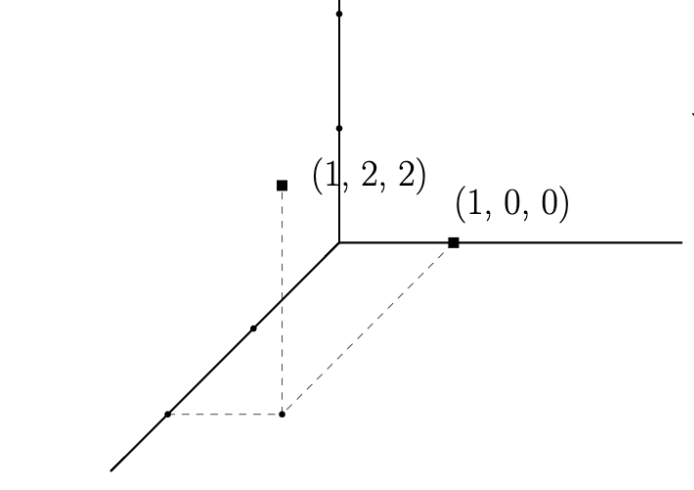


(2) Calculate the value of the margin achieved by this $\mathbf{\theta}$? (4pts)

(3) Solve for $\mathbf{\theta}$, given that the margin is equal to $1/||\mathbf{\theta}||$. (4pts)

(4) Solve for $b$ using your value for $\mathbf{\theta}$. (4pts)

(5) Write down the form of the discriminant function $f(x) = \phi(x)\mathbf{\theta}+b$ as an explicit function of $x$. (4pts)

### 5.2 SVM Kernel (10 Pts)

Suppose we have a dataset in 2-dimensional space which consists of 1 data point $(x_1=2, x_2=2)$ with the positive label and 4 data points $(x_1=1, x_2=1), (x_1=3, x_2=1), (x_1=3, x_2=3), (x_1=1, x_2=3)$ with the negative labels.

(1) Find a feature map, which will map the original 2-dimensional data points to the feature space so that the positive samples and the negative samples are linearly separable with each other. Draw the dataset after mapping in the feature space. (5pts)

(2) In your plot above, draw the decision boundary given by hard-margin linear SVM. Mark the corresponding support vectors. (5pts)